In [1]:
# import PyQt6.QtCore
import os
os.environ["QT_API"] = "pyqt5"
import matplotlib.pyplot as plt

# Use qt backend for matplotlab to use interactive mne plots
%matplotlib qt

import mne 
import analysis.processing
import pandas as pd
import csv 
import os
import tools.helpers
from config import Config
configObj = Config()
configss = configObj.getConfigSnapshot()


mne.set_log_level(verbose='WARNING', return_old_level=False, add_frames=None)

In [2]:
PIDtoCondDict = tools.helpers.getPIDtoCondDict()

c:\Users\erang\Desktop\Reading_task\psychopy_experiment\conditions\conditions.xlsx


ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [2]:
# read group evokeds

oddball_list_0 = []
control_list_0 = []
oddball_list_1 = []
control_list_1 = []


# Counters for epochs
oddball_count_0 = 0
control_count_0 = 0
oddball_count_1 = 0
control_count_1 = 0


for pnum in (1,2, 4, ):
    block_num =  'D0'

    raw = analysis.processing.loadSegmentedData(pnum, block_num)
    raw = raw.apply_function(lambda x: x * 1e6)
    raw.set_eeg_reference(ref_channels=['3RD'])
    # raw = raw.pick(picks = ["1Z", "2Z", "3Z", "4Z", "6Z", "7Z", "8Z", "9Z", "3RD",  "1L", "1R", "2LC", "2RC"])  


    epochs, event_dict = analysis.processing.eventEpochdata(raw)

    # epochs = epochs.apply_baseline(baseline=(None, None))

    oddball = epochs["auditory/onset/stimulus/non_freq"]
    control = epochs["auditory/onset/stimulus/freq"]

    
    oddball_list_0.append(oddball.average())
    control_list_0.append(control.average())

#PZ ~ 7Z
    oddball_count_0 += len(oddball)
    control_count_0 += len(control)


for pnum in (1,2,4, ):
    block_num =  'D1'

    raw = analysis.processing.loadSegmentedData(pnum, block_num)
    raw = raw.apply_function(lambda x: x * 1e6)
    raw.set_eeg_reference(ref_channels=['3RD'])
    # raw = raw.pick(picks = ["1Z", "2Z", "3Z", "4Z", "6Z", "7Z", "8Z", "9Z", "3RD",  "1L", "1R", "2LC", "2RC"])  


    epochs, event_dict = analysis.processing.eventEpochdata(raw)
    # epochs = epochs.apply_baseline(baseline=(None, None))

    oddball = epochs["auditory/onset/stimulus/non_freq"]
    control = epochs["auditory/onset/stimulus/freq"]

    
    oddball_list_1.append(oddball.average())
    control_list_1.append(control.average())

    oddball_count_1 += len(oddball)
    control_count_1 += len(control)

#PZ ~ 7Z    

evokeds = dict(Oddball_first_set=oddball_list_0, Oddball_last_set=oddball_list_1)
fig  =  mne.viz.plot_compare_evokeds(evokeds, picks=['7Z'], styles = {"Oddball_first_set": {"color" :'blue'}, "Oddball_last_set":{"color": 'black'}})


# Print epoch counts
print("Number of epochs for the first set (D0):")
print(f"Oddball: {oddball_count_0}")
print(f"Control: {control_count_0}")

print("\nNumber of epochs for the second set (D1):")
print(f"Oddball: {oddball_count_1}")
print(f"Control: {control_count_1}")

Running autoreject on ch_type=eeg




Estimated consensus=0.50 and n_interpolate=4


c:\Users\erang\Desktop\Reading_task\src\analysis\processing.py:71: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(epochs[~reject_log.bad_epochs])
c:\Users\erang\.conda\envs\env\lib\site-packages\sklearn\decomposition\_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
c:\Users\erang\.conda\envs\env\lib\site-packages\mne\preprocessing\bads.py:45: RuntimeWarning: invalid value encountered in greater
  local_bad = this_z > threshold
c:\Users\erang\Desktop\Reading_task\src\analysis\processing.py:89: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs_clean  = ica.apply(epochs.copy())


Running autoreject on ch_type=eeg




Estimated consensus=0.30 and n_interpolate=3
Running autoreject on ch_type=eeg




Estimated consensus=0.40 and n_interpolate=4


c:\Users\erang\Desktop\Reading_task\src\analysis\processing.py:71: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(epochs[~reject_log.bad_epochs])
c:\Users\erang\.conda\envs\env\lib\site-packages\mne\preprocessing\bads.py:45: RuntimeWarning: invalid value encountered in greater
  local_bad = this_z > threshold
c:\Users\erang\Desktop\Reading_task\src\analysis\processing.py:89: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs_clean  = ica.apply(epochs.copy())


Running autoreject on ch_type=eeg




Estimated consensus=0.30 and n_interpolate=4
Running autoreject on ch_type=eeg




Estimated consensus=0.50 and n_interpolate=4


c:\Users\erang\Desktop\Reading_task\src\analysis\processing.py:71: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(epochs[~reject_log.bad_epochs])
c:\Users\erang\.conda\envs\env\lib\site-packages\mne\preprocessing\bads.py:45: RuntimeWarning: invalid value encountered in greater
  local_bad = this_z > threshold
c:\Users\erang\Desktop\Reading_task\src\analysis\processing.py:89: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs_clean  = ica.apply(epochs.copy())


Running autoreject on ch_type=eeg




Estimated consensus=0.60 and n_interpolate=4
Running autoreject on ch_type=eeg




Estimated consensus=0.50 and n_interpolate=4
No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


c:\Users\erang\Desktop\Reading_task\src\analysis\processing.py:71: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(epochs[~reject_log.bad_epochs])
c:\Users\erang\.conda\envs\env\lib\site-packages\sklearn\decomposition\_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
c:\Users\erang\.conda\envs\env\lib\site-packages\mne\preprocessing\bads.py:45: RuntimeWarning: invalid value encountered in greater
  local_bad = this_z > threshold
c:\Users\erang\Desktop\Reading_task\src\analysis\processing.py:89: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs_clean  = ica.apply(epochs.copy())


Running autoreject on ch_type=eeg




Estimated consensus=0.40 and n_interpolate=4
Running autoreject on ch_type=eeg




Estimated consensus=0.40 and n_interpolate=4


c:\Users\erang\Desktop\Reading_task\src\analysis\processing.py:71: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(epochs[~reject_log.bad_epochs])
c:\Users\erang\.conda\envs\env\lib\site-packages\mne\preprocessing\bads.py:45: RuntimeWarning: invalid value encountered in greater
  local_bad = this_z > threshold
c:\Users\erang\Desktop\Reading_task\src\analysis\processing.py:89: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs_clean  = ica.apply(epochs.copy())


Running autoreject on ch_type=eeg




Estimated consensus=0.40 and n_interpolate=4
Running autoreject on ch_type=eeg




Estimated consensus=0.20 and n_interpolate=4


c:\Users\erang\Desktop\Reading_task\src\analysis\processing.py:71: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(epochs[~reject_log.bad_epochs])
c:\Users\erang\.conda\envs\env\lib\site-packages\mne\preprocessing\bads.py:45: RuntimeWarning: invalid value encountered in greater
  local_bad = this_z > threshold
c:\Users\erang\Desktop\Reading_task\src\analysis\processing.py:89: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs_clean  = ica.apply(epochs.copy())


Running autoreject on ch_type=eeg




Estimated consensus=0.40 and n_interpolate=4
Number of epochs for the first set (D0):
Oddball: 27
Control: 125

Number of epochs for the second set (D1):
Oddball: 32
Control: 106


In [5]:
mne.viz.plot_compare_evokeds(evokeds, picks=['5LB'], styles = {"Oddball_first_set": {"color" :'blue'}, "Oddball_last_set":{"color": 'black'}}, sphere=(0.00, -0.04, 0.00, 0.1255))

[<Figure size 800x600 with 2 Axes>]

In [6]:
Oddball_first_set_evo = mne.combine_evoked(oddball_list_0, weights='nave')
Oddball_last_set_evo = mne.combine_evoked(oddball_list_1, weights='nave')

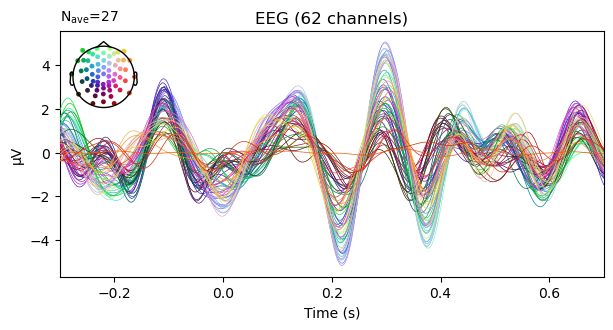

In [7]:
Oddball_first_set_evo.plot(sphere=(0.00, -0.04, 0.00, 0.1255))

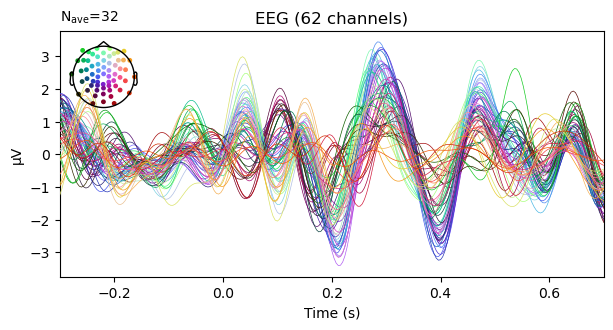

In [8]:
Oddball_last_set_evo.plot(sphere=(0.00, -0.04, 0.00, 0.1255))

In [3]:
mne.viz.plot_compare_evokeds(evokeds, combine = "mean", styles = {"Oddball_first_set": {"color" :'blue'}, "Oddball_last_set":{"color": 'black'}})

[<Figure size 800x600 with 1 Axes>]

In [7]:
fig5  =  mne.viz.plot_compare_evokeds(evokeds, picks=['7Z'], styles = {"Oddball_first_set": {"color" :'blue'}, "Oddball_last_set":{"color": 'black'}})

In [44]:
import mne
import analysis.processing

# Initialize lists to store evokeds
oddball_list_0 = []
control_list_0 = []

pnum = 4
oddball = None
control = None

for block_num in ("D0", "D1"):
    raw = analysis.processing.loadSegmentedData(pnum, block_num)
    raw = raw.apply_function(lambda x: x * 1e6)
    raw.set_eeg_reference(ref_channels=['3RD'])
    # raw = raw.pick(picks=["1Z", "2Z", "3Z", "4Z", "6Z", "7Z", "8Z", "9Z", "3RD", "1L", "1R", "2LC", "2RC"])

    epochs, event_dict = analysis.processing.eventEpochdata(raw)

    oddballi = epochs["auditory/onset/stimulus/non_freq"]
    controli = epochs["auditory/onset/stimulus/freq"]

    if oddball is None:
        oddball = oddballi
    else:
        oddball = mne.concatenate_epochs([oddball, oddballi])

    if control is None:
        control = controli
    else:
        control = mne.concatenate_epochs([control, controli])

# Append the averaged evoked responses to the lists
oddball_list_0.append(oddball.average())
control_list_0.append(control.average())

# Create the dictionary of evokeds
evokeds = dict(Oddball_first_set=oddball_list_0, Control_first_set=control_list_0)

# Plot the evokeds
fig = mne.viz.plot_compare_evokeds(evokeds, picks=['3L'], styles={
    "Oddball_first_set": {"color": 'blue'},
    "Control_first_set": {"color": 'black'}
})

Running autoreject on ch_type=eeg


KeyboardInterrupt: 

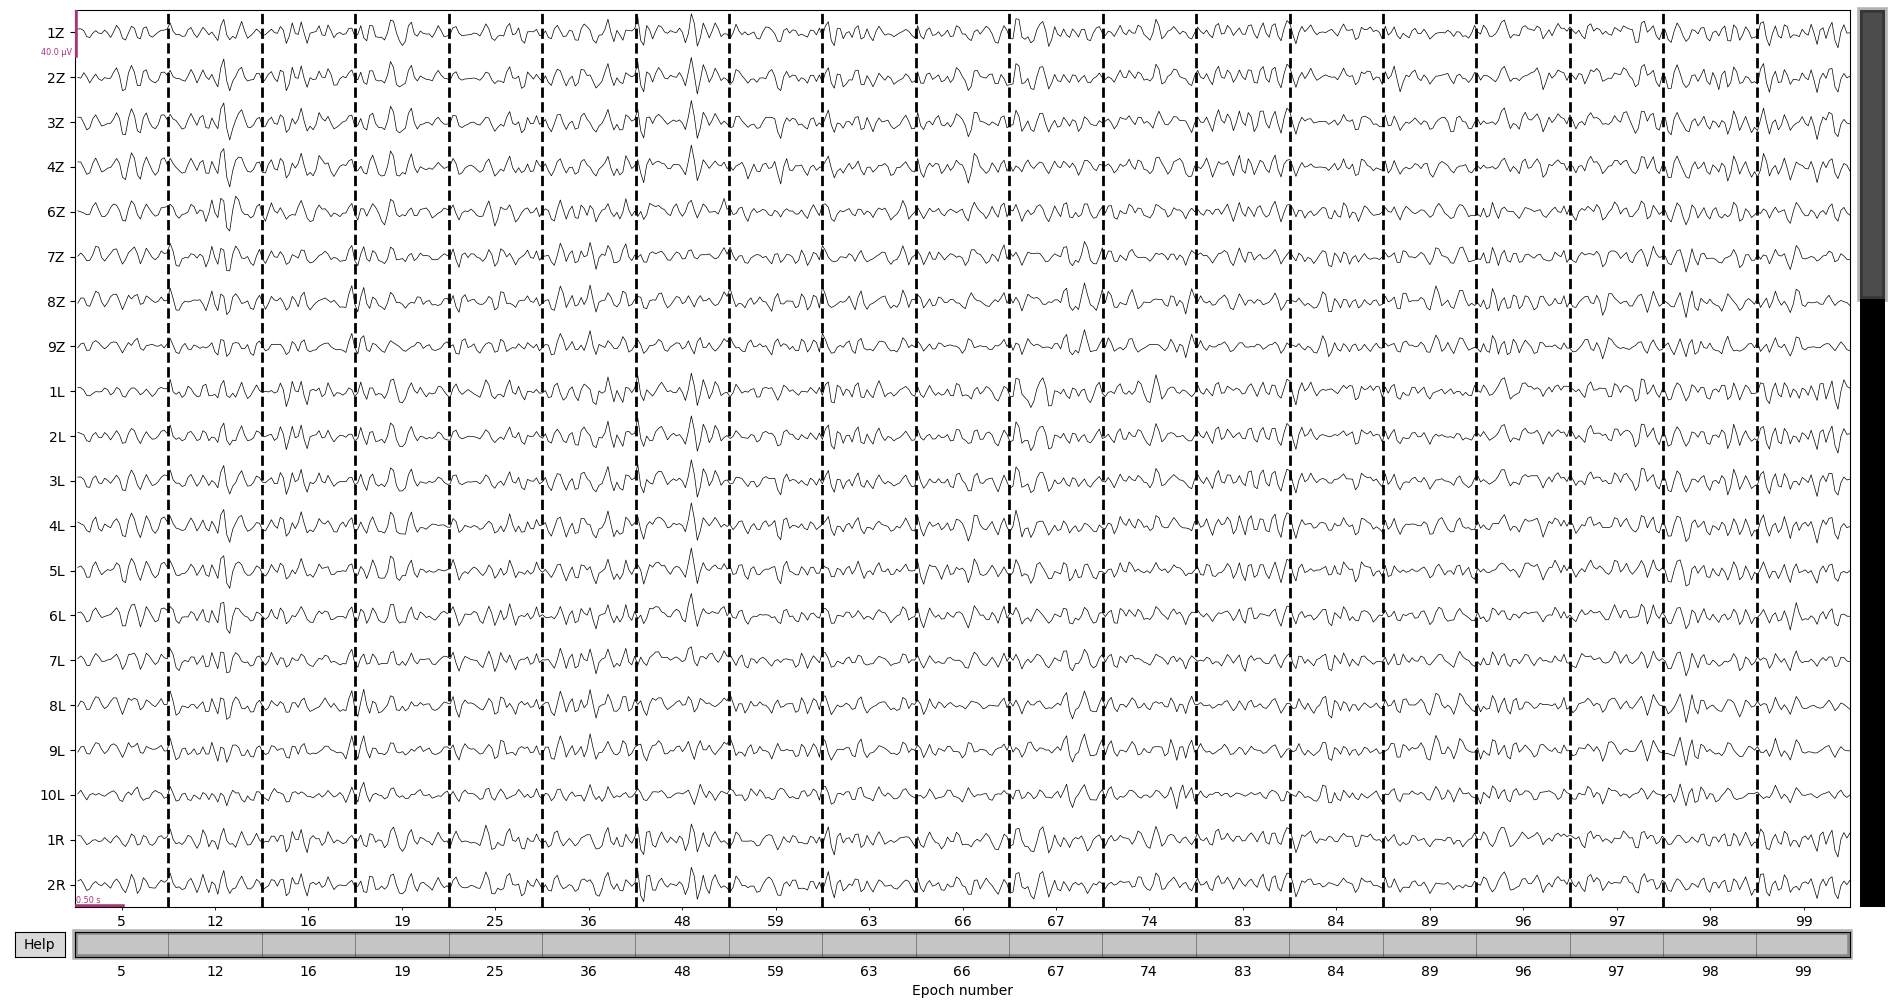

In [23]:
oddball.plot()

In [40]:
# oddball.plot()

evoked_oddball =  oddball.average()

In [42]:
evoked_control =  control.average()

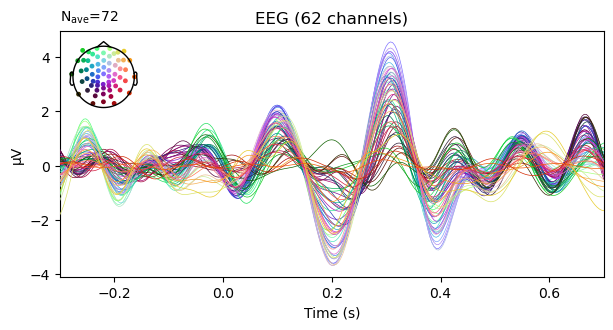

In [43]:
evoked_control.plot(sphere=(0.00, -0.04, 0.00, 0.1255))

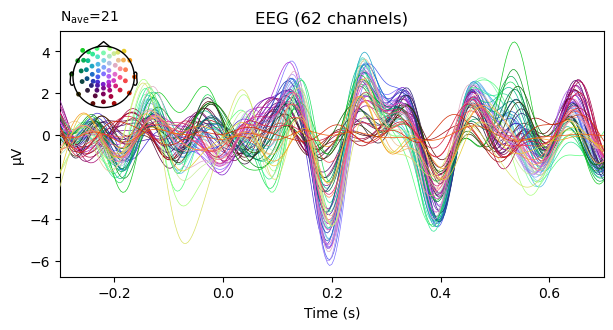

In [41]:
evoked_oddball.plot(sphere=(0.00, -0.04, 0.00, 0.1255))

In [7]:
epochs

Number of events,68
Events,auditory/onset/stimulus/freq: 55auditory/onset/stimulus/non_freq: 13
Time range,-0.300 – 0.700 s
Baseline,-0.300 – -0.100 s


In [4]:
epochs.info

<Info | 11 non-empty values
 bads: []
 ch_names: 1Z, 2Z, 3Z, 4Z, 6Z, 7Z, 8Z, 9Z, 1L, 2L, 3L, 4L, 5L, 6L, 7L, 8L, ...
 chs: 62 EEG
 custom_ref_applied: True
 dig: 65 items (3 Cardinal, 62 EEG)
 file_id: 4 items (dict)
 highpass: 4.0 Hz
 lowpass: 14.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 62
 projs: []
 sfreq: 250.0 Hz
>

In [8]:
fig  =  mne.viz.plot_compare_evokeds(evokeds, picks=['3RC'], styles = {"Oddball_first_set": {"color" :'blue'}, "control_list_0":{"color": 'black'}})

In [2]:
events_from_annot, event_dict =  mne.events_from_annotations(raw)

stimcodes =  tools.helpers.getOVStimCodes()
stimGroups = tools.helpers.getStimGroups()

inv_stimCodesMap =  { v: k for k, v in stimcodes.items()}
inv_stimGroupsMap = { v: k for k, v in stimGroups.items() }


modified_event_dict =  { inv_stimGroupsMap[inv_stimCodesMap[int(k)]] :
                        v for k,v in event_dict.items() 
                        if inv_stimCodesMap[int(k)] in inv_stimGroupsMap}


epoch_event_dict =  {k:v for k, v in modified_event_dict.items() if 'freq' in k}     

tmin = configss['epoch_tmin'] if configss['epoch_tmin'] is not None else None 
tmax = configss['epoch_tmax'] if configss['epoch_tmax'] is not None else None



baseline_correction_l = configss['baseline_correction_l'] \
    if configss['baseline_correction_l'] is not None else None 

baseline_correction_h = configss['baseline_correction_h'] \
    if configss['baseline_correction_h'] is not None else None

epochs = mne.Epochs(raw, events_from_annot, 
                    event_id=epoch_event_dict, tmin=tmin, tmax=tmax,
                        preload=True, 
                    baseline=(
                        baseline_correction_l,
                            baseline_correction_h))

# clean_epochs =  removeArtifacts(raw, epochs)


NameError: name 'raw' is not defined

In [31]:
events_from_annot

array([[218279,      0,      1],
       [243079,      0,      2]])

In [27]:
event_dict

{'33028': 1}

In [24]:
modified_event_dict =  { inv_stimGroupsMap[inv_stimCodesMap[int(k)]] :
                        v for k,v in event_dict.items() 
                        if inv_stimCodesMap[int(k)] in inv_stimGroupsMap}

In [25]:
modified_event_dict

{'timing/attentive/stop': 1}

In [26]:
stimcodes

{'OVTK_StimulationId_ExperimentStart': 32769,
 'OVTK_StimulationId_ExperimentStop': 32770,
 'OVTK_StimulationId_SegmentStart': 32771,
 'OVTK_StimulationId_SegmentStop': 32772,
 'OVTK_StimulationId_TrialStart': 32773,
 'OVTK_StimulationId_TrialStop': 32774,
 'OVTK_StimulationId_BaselineStart': 32775,
 'OVTK_StimulationId_BaselineStop': 32776,
 'OVTK_StimulationId_RestStart': 32777,
 'OVTK_StimulationId_RestStop': 32778,
 'OVTK_StimulationId_VisualStimulationStart': 32779,
 'OVTK_StimulationId_VisualStimulationStop': 32780,
 'OVTK_StimulationId_VisualSteadyStateStimulationStart': 32784,
 'OVTK_StimulationId_VisualSteadyStateStimulationStop': 32785,
 'OVTK_StimulationId_Button1_Pressed': 32786,
 'OVTK_StimulationId_Button1_Released': 32787,
 'OVTK_StimulationId_Button2_Pressed': 32788,
 'OVTK_StimulationId_Button2_Released': 32789,
 'OVTK_StimulationId_Button3_Pressed': 32790,
 'OVTK_StimulationId_Button3_Released': 32791,
 'OVTK_StimulationId_Button4_Pressed': 32792,
 'OVTK_StimulationId

In [23]:
stimGroups

{'auditory/onset/stimulus/non_freq': 'OVTK_StimulationId_Label_01',
 'auditory/onset/stimulus/freq': 'OVTK_StimulationId_Label_02',
 'timing/experiment/start': 'OVTK_StimulationId_ExperimentStart',
 'timing/experiment/stop': 'OVTK_StimulationId_ExperimentStop',
 'timing/attentive/start': 'OVTK_StimulationId_Label_03',
 'timing/attentive/stop': 'OVTK_StimulationId_Label_04',
 'timing/distractive/start': 'OVTK_StimulationId_Label_05',
 'timing/distractive/stop': 'OVTK_StimulationId_Label_06'}

In [22]:
epoch_event_dict

{}

In [21]:
epoch_event_dict

{}

In [20]:
events_from_annot

array([[120637,      0,      1]])

In [19]:
tmin

-0.2

In [5]:
event_dict

NameError: name 'event_dict' is not defined

In [23]:
sorted_df[sorted_df["PID"] == 1]['Block_type']

2    ND
3     D
4    ND
5     D
Name: Block_type, dtype: object

In [25]:
indexed_list = [str(value) + str(index) for index, value in enumerate(list(sorted_df[sorted_df["PID"] == 1]['Block_type']))]
print(indexed_list)

['ND0', 'D1', 'ND2', 'D3']


In [33]:
multiples_dict = {pid: [str(value) + str(index) for index, value in enumerate(list(sorted_df[sorted_df["PID"] == pid]['Block_type']))] for pid in sorted_df["PID"].unique()}

In [34]:
multiples_dict

{-1: ['ND0', 'D1'],
 1: ['ND0', 'D1', 'ND2', 'D3'],
 2: ['D0', 'ND1', 'D2', 'ND3'],
 3: ['ND0', 'D1', 'ND2', 'D3'],
 4: ['D0', 'ND1', 'D2', 'ND3'],
 5: ['ND0', 'D1', 'D2', 'ND3'],
 6: ['ND0', 'D1', 'ND2', 'D3'],
 7: ['ND0', 'D1', 'ND2', 'D3'],
 8: ['D0', 'ND1', 'D2', 'ND3'],
 10: ['D0', 'D1', 'ND2', 'ND3'],
 9: ['D0', 'D1', 'ND2', 'ND3']}

In [30]:
# Function to limit to the first two occurrences of 'D' and 'ND'
def limit_blocks(blocks):
    d_count = 0
    nd_count = 0
    limited_blocks = []
    for index, value in enumerate(blocks):
        if value == 'D' and d_count < 2:
            limited_blocks.append(f'{value}{d_count}')
            d_count += 1
        elif value == 'ND' and nd_count < 2:
            limited_blocks.append(f'{value}{nd_count}')
            nd_count += 1
    return limited_blocks

# Create the dictionary with limited 'D' and 'ND' values
multiples_dict = {pid: limit_blocks(list(sorted_df[sorted_df["PID"] == pid]['Block_type'])) for pid in sorted_df["PID"].unique()}


In [31]:
multiples_dict

{-1: ['ND0', 'D0'],
 1: ['ND0', 'D0', 'ND1', 'D1'],
 2: ['D0', 'ND0', 'D1', 'ND1'],
 3: ['ND0', 'D0', 'ND1', 'D1'],
 4: ['D0', 'ND0', 'D1', 'ND1'],
 5: ['ND0', 'D0', 'D1', 'ND1'],
 6: ['ND0', 'D0', 'ND1', 'D1'],
 7: ['ND0', 'D0', 'ND1', 'D1'],
 8: ['D0', 'ND0', 'D1', 'ND1'],
 10: ['D0', 'D1', 'ND0', 'ND1'],
 9: ['D0', 'D1', 'ND0', 'ND1']}